# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Olakunle Alabi  https://github.com/Tezzyray/web-scrapping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

All prereqs installed.Package                Version
---------------------- -----------
anyio                  3.5.0
appdirs                1.4.4
argon2-cffi            21.3.0
argon2-cffi-bindings   21.2.0
asttokens              2.0.5
attrs                  22.1.0
Babel                  2.11.0
backcall               0.2.0
beautifulsoup4         4.11.1
bleach                 4.1.0
blis                   0.7.9
Bottleneck             1.3.5
brotlipy               0.7.0
catalogue              2.0.8
certifi                2022.12.7
cffi                   1.15.1
charset-normalizer     2.0.4
click                  8.1.5
colorama               0.4.6
comm                   0.1.2
conda                  23.1.0
conda-content-trust    0.1.3
conda-package-handling 1.9.0
confection             0.1.0
config                 0.5.1
contourpy              1.0.5
cryptography           38.0.1
cycler                 0.11.0
cymem                  2.0.7
debugpy                1.5.1
decorator              5.1.1



[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [3]:
import requests
from bs4 import BeautifulSoup
import pickle

def get_article_html(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        article_html = soup.find('article').prettify()  # Extract the <article> element and its content
        return article_html
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the page: {e}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

if __name__ == "__main__":
    archive_url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
    article_html = get_article_html(archive_url)
    if article_html:
        # Save the article HTML to a .pkl file
        output_file = "article_html.pkl"
        with open(output_file, 'wb') as file:
            pickle.dump(article_html, file)
        print(f"Article HTML saved to '{output_file}'.")







Article HTML saved to 'article_html.pkl'.


# Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
import pickle
from bs4 import BeautifulSoup

def print_article_text_from_file(filename):
    try:
        with open(filename, 'rb') as file:
            article_html = pickle.load(file)
            soup = BeautifulSoup(article_html, 'html.parser')
            article_text = soup.get_text()
            print(article_text)
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    file_name = "article_html.pkl"
    print_article_text_from_file(file_name)




   How Laser Headlights Work
  




    130 Comments
   


     by:
    


      Lewin Day
     







     March 22, 2021
    
























   When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
  

   Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
  





   Laser Headlights?!
  



     BWM’s prototype laser headlight assemblies undergoing testing.
    


   The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviou

# Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [5]:
import pickle
import spacy
from collections import Counter
import string

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Remove punctuation and whitespace, and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join(text.split()).lower()
    return text

def get_most_frequent_tokens(doc, n=5):
    # Get the most frequent tokens after preprocessing
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return Counter(tokens).most_common(n)

if __name__ == "__main__":
    file_name = "article_html.pkl"
    
    # Load the article text from the file
    try:
        with open(file_name, 'rb') as file:
            article_html = pickle.load(file)
            article_text = BeautifulSoup(article_html, 'html.parser').get_text()
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        exit()

    # Preprocess the article text
    preprocessed_text = preprocess_text(article_text)

    # Process the preprocessed text using spaCy
    doc = nlp(preprocessed_text)

    # Get the 5 most frequent tokens along with their frequencies
    most_frequent_tokens = get_most_frequent_tokens(doc, n=5)

    # Print the common tokens and their frequencies
    print("Most frequent tokens:")
    for token, frequency in most_frequent_tokens:
        print(f"{token}: {frequency}")







Most frequent tokens:
laser: 31
headlights: 19
headlight: 11
technology: 10
light: 9


# Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
import pickle
import spacy
from collections import Counter
import string

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Remove punctuation and whitespace, and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join(text.split()).lower()
    return text

def get_most_frequent_lemmas(doc, n=5):
    # Get the most frequent lemmas after preprocessing
    lemmas = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return Counter(lemmas).most_common(n)

if __name__ == "__main__":
    file_name = "article_html.pkl"
    
    # Load the article text from the file
    try:
        with open(file_name, 'rb') as file:
            article_html = pickle.load(file)
            article_text = BeautifulSoup(article_html, 'html.parser').get_text()
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        exit()

    # Preprocess the article text
    preprocessed_text = preprocess_text(article_text)

    # Process the preprocessed text using spaCy
    doc = nlp(preprocessed_text)

    # Get the 5 most frequent lemmas along with their frequencies
    most_frequent_lemmas = get_most_frequent_lemmas(doc, n=5)

    # Print the common lemmas and their frequencies
    print("Most frequent lemmas:")
    for lemma, frequency in most_frequent_lemmas:
        print(f"{lemma}: {frequency}")


Most frequent lemmas:
laser: 36
headlight: 30
technology: 10
light: 10
beam: 8


# Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [9]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Remove punctuation and whitespace, and convert to lowercase
    text = text.strip().lower()
    return text

def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence using spaCy
    doc = nlp(preprocess_text(sentence))
    total_words = len(doc)
    interesting_token_count = sum(1 for token in doc if token.text in interesting_tokens)

    # Calculate the score
    if total_words > 0:
        score = interesting_token_count / total_words
        return score
    else:
        return 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy
    doc = nlp(preprocess_text(sentence))
    total_words = len(doc)
    interesting_lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)

    # Calculate the score
    if total_words > 0:
        score = interesting_lemma_count / total_words
        return score
    else:
        return 0

if __name__ == "__main__":
    sentence = "This is an interesting sentence with some relevant words."
    interesting_tokens = ["interesting", "sentence"]
    interesting_lemmas = ["interest", "relevant"]

    # Calculate scores
    token_score = score_sentence_by_token(sentence, interesting_tokens)
    lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)

    # Print scores
    print(f"Token score: {token_score}")
    print(f"Lemma score: {lemma_score}")

Token score: 0.2
Lemma score: 0.1


# Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

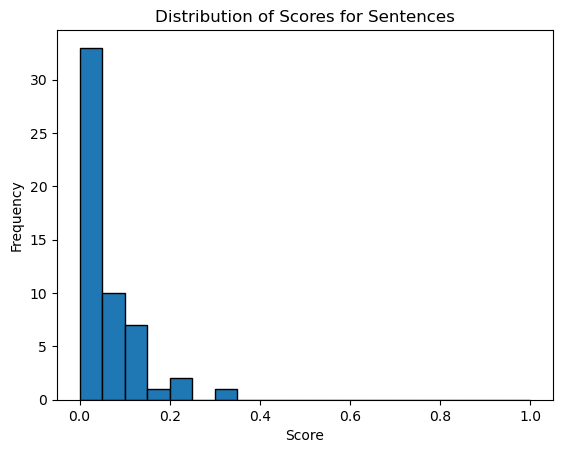

In [10]:
import pickle
import spacy
from collections import Counter
import string
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Remove punctuation and whitespace, and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join(text.split()).lower()
    return text

def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence using spaCy
    doc = nlp(preprocess_text(sentence))
    total_words = len(doc)
    interesting_token_count = sum(1 for token in doc if token.text in interesting_tokens)

    # Calculate the score
    if total_words > 0:
        score = interesting_token_count / total_words
        return score
    else:
        return 0

if __name__ == "__main__":
    file_name = "article_html.pkl"
    
    # Load the article text from the file
    try:
        with open(file_name, 'rb') as file:
            article_html = pickle.load(file)
            article_text = BeautifulSoup(article_html, 'html.parser').get_text()
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        exit()

    # Split the article text into sentences
    sentences = article_text.split(".")

    # Calculate scores for each sentence and store in a list
    interesting_tokens = ["laser", "headlights", "work"]  # Customize this list with your interesting tokens
    scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in sentences]

    # Plot the histogram
    plt.hist(scores, bins=20, range=(0, 1), edgecolor="black")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Scores for Sentences")
    plt.show()



The most common range of scores is 0.0 to 0.05

# Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

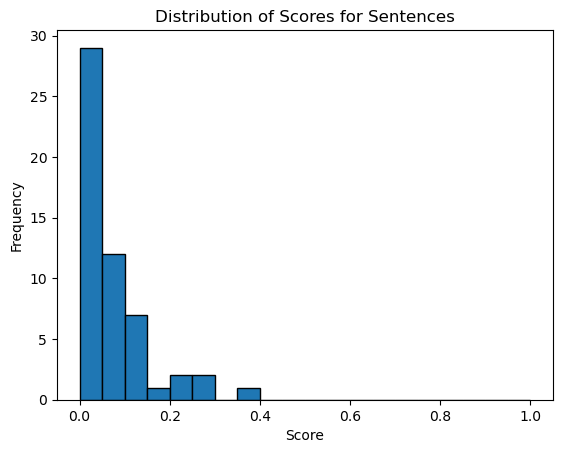

In [11]:
import pickle
import spacy
from collections import Counter
import string
import matplotlib.pyplot as plt

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Remove punctuation and whitespace, and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join(text.split()).lower()
    return text

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence using spaCy
    doc = nlp(preprocess_text(sentence))
    total_words = len(doc)
    interesting_lemma_count = sum(1 for token in doc if token.lemma_ in interesting_lemmas)

    # Calculate the score
    if total_words > 0:
        score = interesting_lemma_count / total_words
        return score
    else:
        return 0

if __name__ == "__main__":
    file_name = "article_html.pkl"
    
    # Load the article text from the file
    try:
        with open(file_name, 'rb') as file:
            article_html = pickle.load(file)
            article_text = BeautifulSoup(article_html, 'html.parser').get_text()
    except FileNotFoundError:
        print(f"Error: File '{file_name}' not found.")
        exit()

    # Split the article text into sentences
    sentences = article_text.split(".")

    # Calculate scores for each sentence and store in a list
    interesting_lemmas = ["laser", "headlight", "work"]  # Customize this list with your interesting lemmas
    scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in sentences]

    # Plot the histogram
    plt.hist(scores, bins=20, range=(0, 1), edgecolor="black")
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Scores for Sentences")
    plt.show()

The most common range of scores is 0.0 to 0.05

# Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

To consider only nouns as interesting words and omit other tokens and lemmas, we can modify the score_sentence_by_token and score_sentence_by_lemma functions to filter out non-noun tokens and lemmas. We can use the pos_ attribute of spaCy tokens to check if a token is a noun or not. Noun tokens have a pos_ value of 'NOUN'.